### Homework 3 - DS 5500

In [1]:
# Importing Libraries:
import pandas as __pd
import numpy as __np
import seaborn as __sbn
import matplotlib.pyplot as __plt

In [2]:
# Importing Data
__rawData = __pd.read_csv('~/Downloads/Sdf16_1a.txt', sep = '\t', low_memory = False)

### Problem 1: Import and explore the district-level fiscal data from 2015-16. Rank and visualize the states that take in the most federal funding (revenue). Which states spend the most federal funding per student?

In [3]:
# Ordering STATES by the amount of intake of Federal Funding
__fiscalData = __rawData[__rawData.TFEDREV > 0]
__fiscalData
__stateWiseData = __fiscalData.groupby('STNAME').sum().sort_values(by = "TFEDREV", ascending = False).reset_index()
__stateWiseData.rename(columns = {'STNAME': 'State', 'TFEDREV': 'FederalFunding'}, inplace = True)

<Figure size 720x360 with 0 Axes>

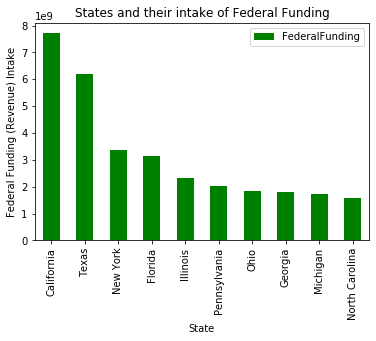

In [4]:
# Plot to capture states with the most intake of Revenues (Federal Funding)
__plt.figure(figsize = (10,5))
__stateWiseData[:10].plot(kind='bar', x = 'State', y = 'FederalFunding', color = 'green')
__plt.ylabel('Federal Funding (Revenue) Intake')
__plt.title('States and their intake of Federal Funding')
__plt.show()

This graph presents the top 10 states with the most amount of Federal Funding that's provided and it's pretty clear from the graph above that states like California and Texas have the larget amount of Federal Funding Intake out of the entire list, followed by New York and Floirida with a gradual drop in the intake.

In [5]:
# Ordering STATES by the amount spent per student
__perStudentExpenditure = __stateWiseData[["State", "TOTALEXP", "V33"]].groupby(['State']).sum()
__perStudentExpenditure['# of students'] = __perStudentExpenditure['V33']
__perStudentExpenditure['Amount Spent'] = round(__perStudentExpenditure['TOTALEXP'] / __perStudentExpenditure['# of students'], 2)
__perStudentExpenditure = __perStudentExpenditure['Amount Spent'].sort_values(ascending = False).reset_index()
__orderedData = __perStudentExpenditure
__orderedData['Rank'] = __perStudentExpenditure['Amount Spent'].rank(ascending = False)

<Figure size 720x360 with 0 Axes>

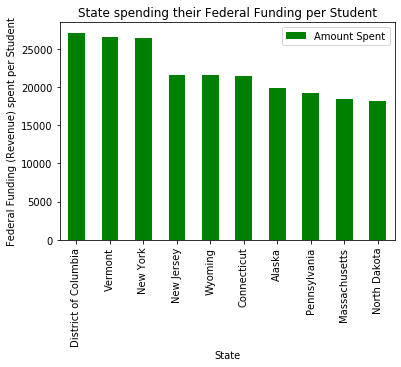

In [6]:
# Plot to capture the amount spent by states per student
__plt.figure(figsize = (10,5))
__orderedData[:10].plot(kind='bar', x = 'State', y = 'Amount Spent', color = 'green')
__plt.ylabel('Federal Funding (Revenue) spent per Student')
__plt.title('State spending their Federal Funding per Student')
__plt.show()

This graph like the one provided earlier, showcases top 10 states that spent the most of their Revenues / Students and there is a close call between District of Columbia, Vermont and New York as these three states spend the most Revenue per Students.

### Problem 2: Visualize the relationship between school districts’ total revenue and expenditures. Which states have the most debt per student?

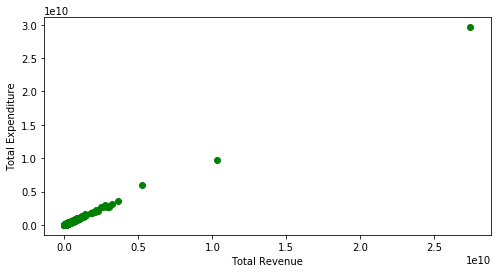

In [7]:
# Getting data for Districts to calculate revenue and expenditure.
__districtData = __rawData[["LEAID", "STNAME", "TOTALREV", "TOTALEXP","V33"]]

# Getting rid of the negative values:
__districtData = __districtData[__districtData["TOTALREV"] >= 0]
__districtData = __districtData[__districtData["TOTALEXP"] >= 0]
__districtData = __districtData[__districtData["V33"] >= 0]

# Visualizing the relationship between TOTAL REVENUE and TOTAL EXPENDITURE:
__plt.figure(figsize = (8,4))
__plt.scatter(data = __districtData, x = "TOTALREV", y = "TOTALEXP", color = 'green')
__plt.xlabel('Total Revenue')
__plt.ylabel('Total Expenditure')
__plt.show()

Ignoring a few outliers in the plot, there seems to be a linear relationship between Total Expenditure and Total Revenue.

In [8]:
# Calculating most debts per student for each STATES
__debtRecords = __districtData[["STNAME", "TOTALEXP", "TOTALREV", "V33"]].groupby(["STNAME"]).sum()

# Calculating total debt:
__debtRecords['Total Debt'] = __debtRecords["TOTALEXP"] - __debtRecords["TOTALREV"]
__debtRecords["Debt / Student"] = __debtRecords["Total Debt"] / __debtRecords["V33"]
__debtRecords = __debtRecords[__debtRecords["Total Debt"] > 0].reset_index()

In [9]:
# Ranking states based on the debts / per student:
__debtRecords["Rank"] = __debtRecords["Debt / Student"].rank(ascending = False)
__debtData = __debtRecords.sort_values(by = ["Rank"]).reset_index()
__debtData.rename(columns = {"STNAME": "State"}, inplace = True)
__debtData = __debtData[["State", "Debt / Student", "Total Debt"]]
__debtData[:5]

,State,Debt / Student,Total Debt
0,North Dakota,1595.613744,172939000
1,District of Columbia,1347.000265,111766000
2,Alaska,968.643614,128323000
3,Nebraska,763.258140,240840000
4,Minnesota,631.011365,543940000


The states mentioned in the table are the top 5 states which have most DEBT / STUDENT, with North Dakota being the number one having the larget Debt per Student value.

### Problem 3: The district-level performance metrics from EDFacts may be useful in your decision. However, to protect student privacy, the data in these datasets has been heavily “blurred” to prevent students from being identified. Therefore, most of the numeric metrics are presented as ranges in string format. In addition, censored and missing data must be imputed. Write and explain a function for processing a single column of “blurred” metrics into usable numeric values. Use it to process and then visualize the distribution of a performance metric of your choice.

### Problem 4: You are tasked with cutting 15% of the U.S. federal budget currently being spent on funding school districts. How much money is this? Choose which school districts will have their funding cut and how this will be done. (You should produce a table of LEA IDs and the dollar amount by which their federal funding will be cut – you do not need print the entire tabl.)

In [10]:
# Calculating total budget available for funding district schools
__fedData = __fiscalData[__fiscalData["TFEDREV"] >= 0]
__totFedRevenue = int(__fedData[["TFEDREV"]].sum())
__cutAmount = int(__totFedRevenue * 0.15)
print("Total U.S. Federal Budget is: {0} and 15% of that amount is: {1}".format(__totFedRevenue, __cutAmount))

Total U.S. Federal Budget is: 55602742000 and 15% of that amount is: 8340411300


In [11]:
__budget = __districtData[["LEAID", "TOTALEXP", "TOTALREV"]].groupby(["LEAID"]).sum().reset_index()
__budget["Debt"] = __budget["TOTALEXP"] - __budget["TOTALREV"]
__budgetNeg = __budget[__budget['Debt'] < 0]
__budgetNeg['Debt'] = - (__budgetNeg['Debt'])
__extraBudget = __budgetNeg['Debt'].sum()

__budgetNeg['Revenue Cut'] = round((__totFedRevenue / __extraBudget) * (__budgetNeg['Debt']))
__revenueCut = __budgetNeg[['LEAID','Revenue Cut']]

__revenueCut[:15]

/Users/mrinal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mrinal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LEAID,Revenue Cut
0,0100005,6399967.0
2,0100007,5523870.0
3,0100008,10124973.0
5,0100012,848521.0
7,0100030,5965100.0
8,0100060,5668118.0
18,0100195,1124290.0
19,0100210,6923929.0
20,0100240,8898861.0
21,0100270,81364649.0


### Problem 5: Provide a statement for your supervisor justifying your decisions on which school districts will lose funding.

Since a few schools have their expenditure lesser than the revenue, they might miss out on the funding as compared to the schools which have higher expenditure than the revenue intake. Schools should loose funding based on the difference between their expenditure and the revenue they receive to ensure that all schools have a fair share of federal funding received from the state. If the revenue assigned is much much larger than their expected expenditure, it makes more sense to cut those schools as schools with lesser funds provided won't suffer from this approach. 